# Imports & Data

In [232]:
import os

from datetime import datetime
from pathlib import Path

from tkinter import *
from tkinter.ttk import *
from tkinter import filedialog as fd
from tkinter import messagebox 
from tkinter.filedialog import askdirectory, askopenfile, askopenfilename

import pandas as pd
import numpy as np

from scipy import stats
import scipy.stats

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import math

In [258]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [259]:
float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

In [261]:
template_1 = pd.read_csv('../Data/pf_GZ0010719HMX_template.csv', names=['y'])
template_2 = pd.read_csv('../Data/pf_GZ0100719HMX_template.csv', names=['y'])
template_3 = pd.read_csv('../Data/pf_GZ1000000023_template.csv', names=['y'])

In [265]:
def template_stats(template_1):
    
    y_vals = template_1['y'].to_list()
    y_vals_arr = np.array(y_vals)
    norm = np.linalg.norm(y_vals_arr)
    y_vals = y_vals_arr/norm
    y_vals_rev = y_vals[::-1]
    plateau_vals = y_vals[200:380]
    mean_height = sum(plateau_vals) / len(plateau_vals)
    reader = 'GZ0010719HMX'

    rising_edges_15 = np.argmax(y_vals > (mean_height * .15))
#     print('rising 15: ', rising_edges_15)
    falling_edges_temp_15 = np.argmax(y_vals_rev > (mean_height * .15))
#     print('falling list 15: ', falling_edges_list_15)
    falling_edges_15 = 700 - int(falling_edges_temp_15)
#     print('falling 15: ', falling_edges_15)
    width_15 = falling_edges_15 - rising_edges_15
#     print('width 15: ', width_15)
        
    rising_edges_30 = np.argmax(y_vals > (mean_height * .3))
    falling_edges_temp_30 = np.argmax(y_vals_rev > (mean_height * .3))
    falling_edges_30 = 700 - int(falling_edges_temp_30)
    width_30 = falling_edges_30 - rising_edges_30
    
    rising_edges_45 = np.argmax(y_vals > (mean_height * .45))
    falling_edges_temp_45 = np.argmax(y_vals_rev > (mean_height * .45))
    falling_edges_45 = 700 - int(falling_edges_temp_45)
    width_45 = falling_edges_45 - rising_edges_45
    
    rising_edges_50 = np.argmax(y_vals > (mean_height * .5))
    falling_edges_temp_50 = np.argmax(y_vals_rev > (mean_height * .5))
    falling_edges_50 = 700 - int(falling_edges_temp_50)
    width_50 = falling_edges_50 - rising_edges_50
    
    rising_edges_65 = np.argmax(y_vals > (mean_height * .65))
    falling_edges_temp_65 = np.argmax(y_vals_rev > (mean_height * .65))
    falling_edges_65 = 700 - int(falling_edges_temp_65)
    width_65 = falling_edges_65 - rising_edges_65
    
    rising_edges_80 = np.argmax(y_vals > (mean_height * .8))
    falling_edges_temp_80 = np.argmax(y_vals_rev > (mean_height * .8))
    falling_edges_80 = 700 - int(falling_edges_temp_80)
    width_80 = falling_edges_80 - rising_edges_80

    rising_edges_90 = np.argmax(y_vals > (mean_height * .9))
    falling_edges_temp_90 = np.argmax(y_vals_rev > (mean_height * .9))
    falling_edges_90 = 700 - int(falling_edges_temp_90)
    width_90 = falling_edges_90 - rising_edges_90
    
    rising_slope = rising_edges_80 - rising_edges_15
    falling_slope = falling_edges_80 - falling_edges_15
    slope_ratio = falling_slope/rising_slope
        
    template_df = pd.DataFrame({
         'reader': reader,
         'temp_width_15': width_15,
         'temp_width_30': width_30,
         'temp_width_45': width_45,
         'temp_width_50': width_50,
         'temp_width_65': width_65,
         'temp_width_80': width_80,
         'temp_width_90': width_90,
         'temp_rising_edges_15': rising_edges_15,
         'temp_rising_edges_30': rising_edges_30,
         'temp_rising_edges_45': rising_edges_45,
         'temp_rising_edges_50': rising_edges_50,
         'temp_rising_edges_65': rising_edges_65,
         'temp_rising_edges_80': rising_edges_80,
         'temp_rising_edges_90': rising_edges_90,
         'temp_falling_edges_15': falling_edges_15,
         'temp_falling_edges_30': falling_edges_30,
         'temp_falling_edges_45': falling_edges_45,
         'temp_falling_edges_50': falling_edges_50,
         'temp_falling_edges_65': falling_edges_65,
         'temp_falling_edges_80': falling_edges_80,
         'temp_falling_edges_90': falling_edges_90,
         'temp_rising_slope': rising_slope,
         'temp_falling_slope': falling_slope,
         'temp_slope_ratio': slope_ratio
}, index=[0])
    
    return template_df

In [263]:
GZ0010719HMX = template_stats(template_1)
GZ0010719HMX

,reader,temp_width_15,temp_width_30,temp_width_45,temp_width_50,temp_width_65,temp_width_80,temp_width_90,temp_rising_edges_15,temp_rising_edges_30,temp_rising_edges_45,temp_rising_edges_50,temp_rising_edges_65,temp_rising_edges_80,temp_rising_edges_90,temp_falling_edges_15,temp_falling_edges_30,temp_falling_edges_45,temp_falling_edges_50,temp_falling_edges_65,temp_falling_edges_80,temp_falling_edges_90,temp_rising_slope,temp_falling_slope,temp_slope_ratio
0,GZ0010719HMX,360,336,316,310,291,270,250,107,117,126,129,138,148,158,467,453,442,439,429,418,408,41,-49,-1.195122


In [196]:
GZ0100719HMX = template_stats(template_2)
GZ0100719HMX

,reader,temp_width_15,temp_width_30,temp_width_45,temp_width_50,temp_width_65,temp_width_80,temp_width_90,temp_rising_edges_15,temp_rising_edges_30,temp_rising_edges_45,temp_rising_edges_50,temp_rising_edges_65,temp_rising_edges_80,temp_rising_edges_90,temp_falling_edges_15,temp_falling_edges_30,temp_falling_edges_45,temp_falling_edges_50,temp_falling_edges_65,temp_falling_edges_80,temp_falling_edges_90,temp_rising_slope,temp_falling_slope,temp_slope_ratio
0,GZ0100719HMX,336,310,291,284,267,244,224,118,129,138,141,149,160,170,454,439,429,425,416,404,394,42,-50,-1.190476


In [194]:
GZ1000000023 = template_stats(template_3) 
GZ1000000023

,reader,temp_width_15,temp_width_30,temp_width_45,temp_width_50,temp_width_65,temp_width_80,temp_width_90,temp_rising_edges_15,temp_rising_edges_30,temp_rising_edges_45,temp_rising_edges_50,temp_rising_edges_65,temp_rising_edges_80,temp_rising_edges_90,temp_falling_edges_15,temp_falling_edges_30,temp_falling_edges_45,temp_falling_edges_50,temp_falling_edges_65,temp_falling_edges_80,temp_falling_edges_90,temp_rising_slope,temp_falling_slope,temp_slope_ratio
0,GZ1000000023,365,336,315,309,289,266,244,110,121,130,133,142,153,164,475,457,445,442,431,419,408,43,-56,-1.302326


In [379]:
rating = pd.read_csv('../Data/signal ratings.csv')
rating

,U_num,rating,trimmed
0,U181,1,U181
1,U323,1,U323
2,U344,1,U344
3,U350,1,U350
4,U371,1,U371
5,U411,1,U411
6,U424,1,U424
7,U431,1,U431
8,U464,1,U464
9,U473,1,U473


In [ ]:
# bad_rating = rating[rating['rating'] < 4 ] 
# bad_rating = bad_rating['trimmed'].to_list()

In [ ]:
# bad_rating

In [266]:
def getFilename():
    filename = fd.askopenfilename()
    print('filename: ', filename)
    return Path(filename)

In [267]:
def getPath():
    root = Tk()
    root.withdraw()
    InputPath = askdirectory(title="Choose Directory")
    root.destroy()
    p = Path(InputPath)
    
    files = []
    for item in p.glob('**/*'):
        if item.suffix in ['.txt']:
            name = item.name
            dname = name
            dname = dname[:-8]
            files.append(str(p) + "\\" + str(dname) + "\\" + "Data" + "\\" + str(name))
#     print('filename: ', files)
            
#     remove_list = []
#     for rating in bad_rating:
#         for file in files:
#             if file.find(rating) != -1:
#                 remove_list.append(file)
# #                 print("Found", file)
#             else:
#                 pass
            
#     files = [n for n in files if n not in remove_list]
    
    return files

In [268]:
def add_info(data_file):
    
    print('data file: ', data_file)
    site = str(data_file).split("\\", 10)
    site = site[8].split(" ")[0]
    correlate = str(data_file).split("\\", 10)
    correlate = correlate[9]
    title = str(data_file).split("Data\\", 1)
    title = title[1]
    title = title[:-4]
    title_split = title.split('_')
    reader = title_split[1]
    print('reader: ', reader)
    u_number = title_split[2]
    date = title_split[3]
    date = datetime.strptime(date, "%d%m%Y")
    date = date.strftime("%d-%m-%y")
        
    path_df = pd.DataFrame(
        {"site": site,
         "date": date,
         "u_number": u_number,
         "correlate": correlate,
         "reader": reader
        }, index=[0]) 
    
    
    if (path_df['reader'] == 'GZ0010719HMX').all():
        path_df = pd.concat([path_df, GZ0010719HMX], axis=1, join='inner')
    elif (path_df['reader'] == 'GZ0100719HMX').all():
        path_df = pd.concat([path_df, GZ0100719HMX], axis=1, join='inner')
    elif (path_df['reader'] == 'GZ1000000023').all():
        path_df = pd.concat([path_df, GZ1000000023], axis=1, join='inner')
    else:
        pass
    
    path_df = path_df.loc[:,~path_df.columns.duplicated()]
        
    return path_df

Pearson Correlation Score:    
1) Cycle Data needs to be matched up with template data - use the y data, not the metrics  
2) Each cycle is given a Pearson correlation score relative to the template  
3) If score is below 90%, it's thrown out  

In [395]:
def pearson_score(cycle_arrays, template_1):
    data_list = df['y'].to_list()
    n = 700
    cycle_arrays = [data_list[i: i + n] for i in range(0, len(data_list), n)]
    cycle_arrays = np.array(cycle_arrays)

    y_vals = template_1['y'].to_list()
    y_vals.pop()
    y_vals_arr = np.array(y_vals)
    norm = np.linalg.norm(y_vals_arr)
    y_vals_norm = y_vals_arr/norm
#     print('template length: ', len(y_vals_norm))
    
    scores = []
    for n in range(0, len(cycle_arrays)):
        scores.append(np.corrcoef(cycle_arrays[n], y_vals_norm)[0,1])
        
    good_scores = [x for x in scores if x > .9]
        
    return good_scores        

In [396]:
pearson_score(cycle_arrays, template_1)

[]

700

In [13]:
# add the info for other columns in here so they can get passed along through the other functions

def single_cycle_plot(data_file):
    
    df = pd.read_csv(data_file, names=['y'])
    df = df[0:21000]
        
    sns.set_style("dark")
    plt.figure(figsize = (12, 5))
    plt.title(f'All Cycles:')
    
    plt.plot(df)
    
    return df

In [14]:
def indiv_cycles(df):

    data_list = df['y'].to_list()
    n = 700
    cycle_arrays = [data_list[i: i + n] for i in range(0, len(data_list), n)]
    cycle_arrays = np.array(cycle_arrays)
    
    sns.set_style("dark")
    plt.figure(figsize = (12, 5))
    plt.title('Stacked Cycles')

    for x in range(0, len(cycle_arrays)):
        plt.plot(cycle_arrays[x])
        
    return cycle_arrays

In [15]:
def zero_pinned(cycle_arrays):
    
    pinned_arrays = np.array(cycle_arrays)
    
    sns.set_style("dark")
    plt.figure(figsize = (12, 5))
    plt.title('Zero Pinned Cycles')

    for x in range(0, len(pinned_arrays)):
        pinned_arrays[x] = pinned_arrays[x] - pinned_arrays[x][0]
        plt.plot(pinned_arrays[x])

    return pinned_arrays

In [16]:
def double_pinned(pinned_arrays):
    
    copy_pinned = pinned_arrays.copy()
    x_list = copy_pinned
    
    for i in range(0, len(pinned_arrays)):
        for j in range(0, 700):
            x_list[i][j] = j + 1

    new_cycle_array_x = x_list
    new_cycle_array_y = pinned_arrays

    for n in range(0, len(new_cycle_array_y)):

        new_x = []
        new_y = []
        new_xp = []
        new_yp = []

        '''For loop to pin each cycle to the origin and create list of the last value in each cycle'''

        new_y = pinned_arrays[n]
        end_yp = new_y[699]

        for i in range(0, len(new_y)):
            new_x.append(i)
            new_xp.append(i)
            new_yp.append(i)

        '''While loop to adjust cycle depending on its last value...'''

        '''Clockwise adjustment if cycle ends above 0 (postive value)'''

        rad = new_y[699]/700

        for i in range(0, len(new_y)):
            xp =  new_x[i] * math.cos(rad) + new_y[i] * math.sin(rad)
            yp = -new_x[i] * math.sin(rad) + new_y[i] * math.cos(rad)
            new_xp[i] = xp
            new_yp[i] = yp
            end_yp = yp

        new_cycle_array_x[n] = new_xp
#         print('new cycle array x: ',new_cycle_array_x)
        new_cycle_array_y[n] = new_yp
#         print('new cycle array y: ',new_cycle_array_y)
    
#     x_ensemble = np.mean(new_cycle_array_x, axis=0)
#     y_ensemble = np.mean(new_cycle_array_y, axis=0)
#     y_ensemble = pd.DataFrame(y_ensemble)
#     y_ensemble.to_csv('y_ensemble.csv', index=False, header=False)
    
#     print('y ensemble: ', y_ensemble)
        
    sns.set_style("dark")
    plt.figure(figsize = (12, 5))
    plt.title('Double Pinned Cycles')
        
    for n in range(0, len(new_cycle_array_y)):
        plt.plot(new_cycle_array_x[n], new_cycle_array_y[n])
            
    return new_cycle_array_x, new_cycle_array_y

In [17]:
def mean_height(double_pinned_arrays_y):
    
    plateau_avgs = []
    for n in range(0, len(double_pinned_arrays_y)):
        plateau_vals = double_pinned_arrays_y[n][200:380:1]
        plateau_avgs.append(sum(plateau_vals) / len(plateau_vals))
    
    return plateau_avgs

In [18]:
def zero_error(falling_slope, rising_slope):
    try:
        return falling_slope/rising_slope
    except ZeroDivisionError:
        return 0

In [206]:
# TURN LAMBDA INTO FUNCTION TO MAKE THE BELOW MORE PYTHONIC

def width_stats(double_pinned_arrays_y):
    rising_edges_15 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_15.append(list(map(lambda x: x > (plateau_avgs[n] * .15), double_pinned_arrays_y[n])).index(True))
    rising_15_avg = sum(rising_edges_15) / len(rising_edges_15)
    
    falling_edges_list_15 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_15.append(list(map(lambda x: x > (plateau_avgs[n] * .15), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_15 = [700 - i for i in falling_edges_list_15]
    falling_15_avg = sum(falling_edges_15) / len(falling_edges_15)

    width_15 = []
    zip_object = zip(rising_edges_15, falling_edges_15)
    for rising_edges_15_i, falling_edges_15_i in zip_object:
        width_15.append(falling_edges_15_i - rising_edges_15_i)
    width_15_avg = sum(width_15) / len(width_15)
        
    rising_edges_30 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_30.append(list(map(lambda x: x > (plateau_avgs[n] * .3), double_pinned_arrays_y[n])).index(True))
    rising_30_avg = sum(rising_edges_30) / len(rising_edges_30)
    
    falling_edges_list_30 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_30.append(list(map(lambda x: x > (plateau_avgs[n] * .3), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_30 = [700 - i for i in falling_edges_list_30]
    falling_30_avg = sum(falling_edges_30) / len(falling_edges_30)

    width_30 = []
    zip_object = zip(rising_edges_30, falling_edges_30)
    for rising_edges_30_i, falling_edges_30_i in zip_object:
        width_30.append(falling_edges_30_i - rising_edges_30_i)
    width_30_avg = sum(width_30) / len(width_30)

    rising_edges_45 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_45.append(list(map(lambda x: x > (plateau_avgs[n] * .45), double_pinned_arrays_y[n])).index(True))
    rising_45_avg = sum(rising_edges_45) / len(rising_edges_45)

    falling_edges_list_45 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_45.append(list(map(lambda x: x > (plateau_avgs[n] * .45), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_45 = [700 - i for i in falling_edges_list_45]
    falling_45_avg = sum(falling_edges_45) / len(falling_edges_45)

    width_45 = []
    zip_object = zip(rising_edges_45, falling_edges_45)
    for rising_edges_45_i, falling_edges_45_i in zip_object:
        width_45.append(falling_edges_45_i - rising_edges_45_i)
    width_45_avg = sum(width_45) / len(width_45)

    rising_edges_50 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_50.append(list(map(lambda x: x > (plateau_avgs[n] * .5), double_pinned_arrays_y[n])).index(True))
    rising_50_avg = sum(rising_edges_50) / len(rising_edges_50)

    falling_edges_list_50 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_50.append(list(map(lambda x: x > (plateau_avgs[n] * .5), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_50 = [700 - i for i in falling_edges_list_50]
    falling_50_avg = sum(falling_edges_50) / len(falling_edges_50)

    width_50 = []
    zip_object = zip(rising_edges_50, falling_edges_50)
    for rising_edges_50_i, falling_edges_50_i in zip_object:
        width_50.append(falling_edges_50_i - rising_edges_50_i)
    width_50_avg = sum(width_50) / len(width_50)
        
    rising_edges_65 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_65.append(list(map(lambda x: x > (plateau_avgs[n] * .65), double_pinned_arrays_y[n])).index(True))
    rising_65_avg = sum(rising_edges_65) / len(rising_edges_65)
    
    falling_edges_list_65 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_65.append(list(map(lambda x: x > (plateau_avgs[n] * .65), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_65 = [700 - i for i in falling_edges_list_65]
    falling_65_avg = sum(falling_edges_65) / len(falling_edges_65)

    width_65 = []
    zip_object = zip(rising_edges_65, falling_edges_65)
    for rising_edges_65_i, falling_edges_65_i in zip_object:
        width_65.append(falling_edges_65_i - rising_edges_65_i)
    width_65_avg = sum(width_65) / len(width_65)
    
    rising_edges_80 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_80.append(list(map(lambda x: x > (plateau_avgs[n] * .80), double_pinned_arrays_y[n])).index(True))
    rising_80_avg = sum(rising_edges_80) / len(rising_edges_80)
    
    falling_edges_list_80 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_80.append(list(map(lambda x: x > (plateau_avgs[n] * .80), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_80 = [700 - i for i in falling_edges_list_80]
    falling_80_avg = sum(falling_edges_80) / len(falling_edges_80)

    width_80= []
    zip_object = zip(rising_edges_80, falling_edges_80)
    for rising_edges_80_i, falling_edges_80_i in zip_object:
        width_80.append(falling_edges_80_i - rising_edges_80_i)
    width_80_avg = sum(width_80) / len(width_80)
    
    rising_edges_90 = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_edges_90.append(list(map(lambda x: x > (plateau_avgs[n] * .90), double_pinned_arrays_y[n])).index(True))
    rising_90_avg = sum(rising_edges_90) / len(rising_edges_90)
    
    falling_edges_list_90 = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_edges_list_90.append(list(map(lambda x: x > (plateau_avgs[n] * .90), double_pinned_arrays_y[n][::-1])).index(True))
        falling_edges_90 = [700 - i for i in falling_edges_list_90]
    falling_90_avg = sum(falling_edges_90) / len(falling_edges_90)

    width_90 = []
    zip_object = zip(rising_edges_90, falling_edges_90)
    for rising_edges_90_i, falling_edges_90_i in zip_object:
        width_90.append(falling_edges_90_i - rising_edges_90_i)
    width_90_avg = sum(width_90) / len(width_90)
    
    rising_slope = []
    for n in range(0, len(double_pinned_arrays_y)):
        rising_slope.append(rising_edges_80[n] - rising_edges_15[n])
    rising_slope_avg = sum(rising_slope) / len(rising_slope)
    
    falling_slope = []
    for n in range(0, len(double_pinned_arrays_y)):
        falling_slope.append(falling_edges_80[n] - falling_edges_15[n])
    falling_slope_avg = sum(falling_slope) / len(falling_slope)
    
    slope_ratio = []
    for n in range(0, len(double_pinned_arrays_y)):
        slope_ratio.append(zero_error(falling_slope[n], rising_slope[n]))
    slope_ratio_avg = sum(slope_ratio) / len(slope_ratio)
    
        
    metrics_df = pd.DataFrame({
         'width_15': width_15,
         'width_30': width_30,
         'width_45': width_45,
         'width_50': width_50,
         'width_65': width_65,
         'width_80': width_80,
         'rising_edges_15': rising_edges_15,
         'rising_edges_30': rising_edges_30,
         'rising_edges_45': rising_edges_45,
         'rising_edges_50': rising_edges_50,
         'rising_edges_65': rising_edges_65,
         'rising_edges_80': rising_edges_80,
         'falling_edges_15': falling_edges_15,
         'falling_edges_30': falling_edges_30,
         'falling_edges_45': falling_edges_45,
         'falling_edges_50': falling_edges_50,
         'falling_edges_65': falling_edges_65,
         'falling_edges_80': falling_edges_80,
         'rising_slope': rising_slope,
         'falling_slope': falling_slope,
         'slope_ratio': slope_ratio
#          'width_15_avg': width_15_avg,
#          'width_30_avg': width_30_avg,
#          'width_45_avg': width_45_avg,
#          'width_50_avg': width_50_avg,
#          'width_65_avg': width_65_avg,
#          'width_80_avg': width_80_avg,
#          'width_90_avg': width_90_avg,
#          'rising_15_avg': rising_15_avg,
#          'rising_30_avg': rising_30_avg,
#          'rising_45_avg': rising_45_avg,
#          'rising_50_avg': rising_50_avg,
#          'rising_65_avg': rising_65_avg,
#          'rising_80_avg': rising_80_avg,
#          'rising_90_avg': rising_90_avg,
#          'falling_15_avg': falling_15_avg,
#          'falling_30_avg': falling_30_avg,
#          'falling_45_avg': falling_45_avg,
#          'falling_50_avg': falling_50_avg,
#          'falling_65_avg': falling_65_avg,
#          'falling_80_avg': falling_80_avg,
#          'falling_90_avg': falling_90_avg,
#          'rising_slope_avg': rising_slope_avg,
#          'falling_slope_avg': falling_slope_avg,
#          'slope_ratio_avg': slope_ratio_avg
        })
    
    metrics_df['cycle_number'] = metrics_df.index
    
#     metrics_df[["cycle_number", "rising_edges_15", "width_15", "rising_edges_30", "width_30", "rising_edges_45", "width_45",\
#                 "rising_edges_50", "width_50", "rising_edges_65", "width_65", "rising_edges_80", "width_80"]]=\
#     metrics_df[["cycle_number", "rising_edges_15", "width_15", "rising_edges_30", "width_30", "rising_edges_45", "width_45",\
#                 "rising_edges_50", "width_50", "rising_edges_65", "width_65", "rising_edges_80", "width_80"]].astype(int)
    
    cols = metrics_df.columns.tolist()
    cols = cols[-1:] + cols[:-1]
    metrics_df = metrics_df[cols]
    
    return metrics_df

# Main Loop

Manual selection
filename:  C:/Users/SamLindy/Dropbox (Hemex Health)/Daren Sam L Working/working database/0a Jagdalpur/2021/Jagdalpur 20210501 raw/Pf/MOD_GZ0010719HMX_U181_04022020_112345/Data/MOD_GZ0010719HMX_U181_04022020_112345_Raw.txt
data file:  C:\Users\SamLindy\Dropbox (Hemex Health)\Daren Sam L Working\working database\0a Jagdalpur\2021\Jagdalpur 20210501 raw\Pf\MOD_GZ0010719HMX_U181_04022020_112345\Data\MOD_GZ0010719HMX_U181_04022020_112345_Raw.txt
reader:  GZ0010719HMX


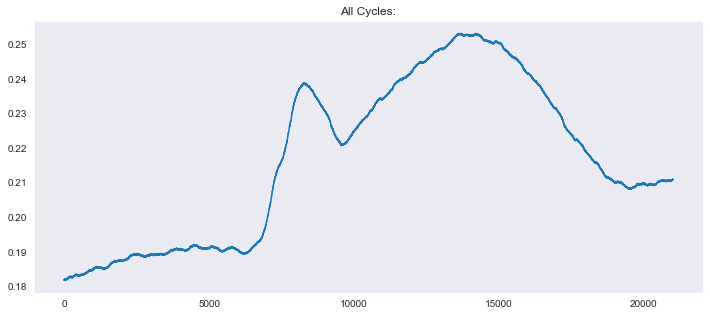

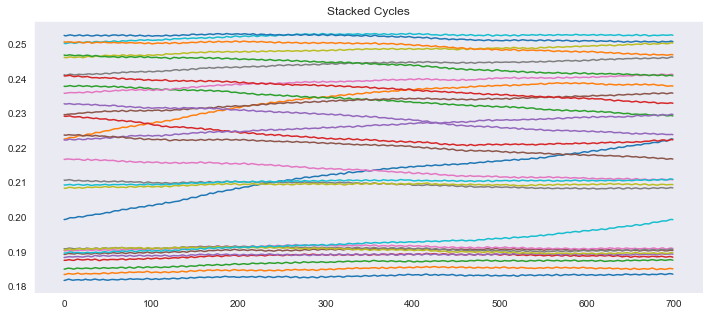

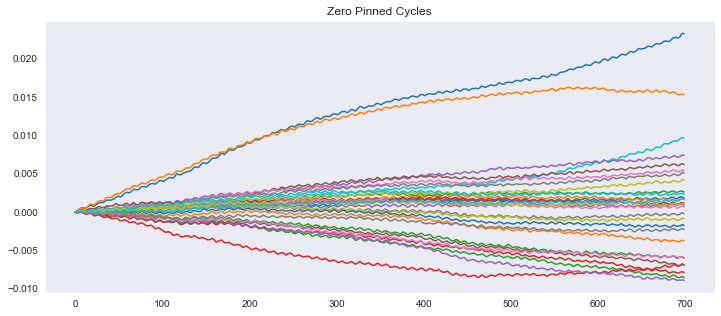

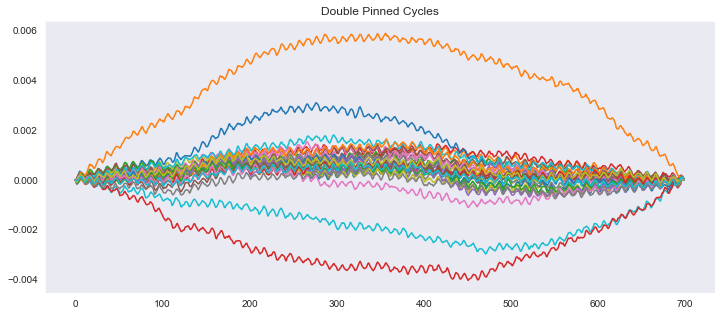

In [380]:
# create pop window that asks if user wants to do a recursive loop or not
state_1 = messagebox.askyesno("Manual or Recursive loop?","Recursive loop?")

# if user selects yes, allow user to choose directory and then output the selected directory 
if state_1 == True:
    print("Recursive selection")
    directory = getPath()
    mode = "recursive"
    
# keep 2 for step size to skip over time text files    
    dataframes = []
    for i in range(0, len(directory), 2):

        data_file = directory[i]
        df = single_cycle_plot(data_file)
        cycle_arrays = indiv_cycles(df)
        pinned_arrays = zero_pinned(cycle_arrays)
        double_pinned_arrays = double_pinned(pinned_arrays)
        
        double_pinned_arrays_x = double_pinned_arrays[0]
        double_pinned_arrays_y = double_pinned_arrays[1]
        
        plateau_avgs = mean_height(double_pinned_arrays_y)
        width_metrics = width_stats(double_pinned_arrays_y)
        path_df = add_info(data_file)
        concat_df = pd.concat([path_df, width_metrics], axis=1)
        dataframes.append(concat_df)
    
    metrics_df = pd.concat(dataframes, axis=0)
    metrics_df.to_csv('recursive_metrics.csv', index=False)
        
        # comment out if do the full 
#         stop = messagebox.askyesno("Pause?","Continue with next file?")
#         if stop == False:
#             break
            
# if user selects no, go into manual mode
else:
    print("Manual selection")
    state_1 = False
    mode = "manual"

    # once in manual mode, allow user to select a file and then ask if they want to select another
    while state_1 == False:
        data_file = getFilename()

        df = single_cycle_plot(data_file)
        cycle_arrays = indiv_cycles(df)
        pinned_arrays = zero_pinned(cycle_arrays)
        double_pinned_arrays = double_pinned(pinned_arrays)
        
        double_pinned_arrays_x = double_pinned_arrays[0]
        double_pinned_arrays_y = double_pinned_arrays[1]
        
        plateau_avgs = mean_height(double_pinned_arrays_y)
        width_metrics = width_stats(double_pinned_arrays_y)
        path_df = add_info(data_file)
        concat_df = pd.concat([path_df, width_metrics], axis=1)
        concat_df.to_csv('manual_metrics.csv', index=False)
        
        another_file = messagebox.askyesno("Another file?","Continue with next file?")

        if another_file == False:
            state_1 = True


In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(plateau_avgs)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=plateau_avgs);
# ax.xaxis.set_major_locator(ticker.MultipleLocator())
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

This 'for loop' captures the mean value of each cycle's plateau.

In [ ]:
mean = sum(plateau_avgs) / len(plateau_avgs)
variance = sum([((x - mean) ** 2) for x in plateau_avgs]) / len(plateau_avgs)
std_dev = variance ** 0.5
std_dev

For this sample, there is a very small standard deviation, demonstrating a tight range during this portion of each cycle.

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_15, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_15);

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_30, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_30)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_45, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_45)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_50, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_50)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_65, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_65)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

In [ ]:
sns.set_style('darkgrid')
ax = sns.histplot(width_80, discrete=True)
ax.locator_params(axis='x', integer=True)
ax.locator_params(axis='y', integer=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(x=width_80)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter());

In [ ]:
averages

The averages array (see above) contains the mean height of each sample as well as the width measurements at 15%, 30%, 45%, 50%, 65%, and 80%.

In [ ]:
overall_avg = []
for i in averages:
    overall_avg.append(sum(i) / len(i))
overall_avg

In [ ]:
# export all metrics into a csv 

# first create a dictionary of the width metrics
width_metrics = {'mean_height':plateau_avgs, 'width_15': width_15, 'width_30': width_30, 'width_45': width_45, 
                 'width_50': width_50, 'width_65':width_65, 'width_80':width_80}

In [ ]:
width_metrics = pd.DataFrame(width_metrics)
width_metrics

In [ ]:
width_metrics.loc['mean'] = width_metrics.mean()
width_metrics[["width_15", "width_30", "width_45", "width_50", "width_65", "width_80"]] = width_metrics[["width_15", "width_30", "width_45", 
                                                                                                         "width_50", "width_65", "width_80"]].astype(int)
width_metrics

In [ ]:
# consolidate all of the metrics above into a single function and output like below

width_metrics.to_csv('width_metrics.csv')

# OLD CODE TO DELETE

Pseudo Code for Recursive Scan of Directory and then apply Visual/Metric building function to those files:     
1) Go into a given directory and build a list of files   
    Use tkinter to offer option to select one file at a time (manual option) or to go through entire directory (recursive option)  
    Like Daren did in his code below, this will require a function that uses for loops that work off the answer from message box  
    Also requires a pause option to review after processing a data file    
    
2) Compile the code that builds the plots and creates the width metrics for the cycles into a single function (or maybe a few shorter ones)   
    Apply those functions to the list of files created above   
    Output the metrics to a csv or txt file    
    Output plots to pngs  

In [ ]:
df = pd.read_csv(r'../Data/U44_Raw.txt', names=['y'])
df.to_csv('../Data/test_data_1.csv')

# Exploratory Data Analysis

In [ ]:
df.head(10)

In [ ]:
df.shape

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (12, 5))

cycle = df.iloc[:700]

plt.plot(cycle)

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (15, 5))

plt.plot(df)
plt.title("All Cycles", fontsize=20,fontweight=0, color='orange');

In [ ]:
data_list = df['y'].to_list()
cycle_arrays = np.array_split(data_list, 30)
len(cycle_arrays)

In [ ]:
n = 700
cycle_arrays = [data_list[i: i +n] for i in range(0, len(data_list), n)]

len(cycle_arrays)

In [ ]:
cycle_arrays

In [ ]:
df['x'] = range(21000)
x_list = df['x'].to_list()
x_arrays = np.array_split(x_list, 30)

In [ ]:
df['x'] = range(0,len(df))
df['x']
x_list = df['x'].to_list()

n = 700
x_list = [x_list[i: i + n] for i in range(0, len(x_list), n)]
x_list

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (12, 5))

cycles_mean = np.mean(cycle_arrays, axis=0)

plt.plot(cycles_mean)
plt.title("Mean of Cycles (No Adjustment)", fontsize=20,fontweight=0, color='orange');

Here is the mean of all signals 30 signals, captured in its own plot. Now, let's add the mean to the rest of the plots to highlight the noise in the signals.

In [ ]:
cycle_arrays.append(cycles_mean)
cycle_arrays

In [ ]:
len(cycle_arrays)

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (12, 5))

for i in range(len(cycle_arrays)):
    plt.plot(cycle_arrays[i])
    
plt.title("All Cycles (No Adjustment)", fontsize=20,fontweight=0, color='orange');

In [ ]:
sns.set_style("dark")
plt.figure(figsize = (12, 5))

for i in range(len(cycle_arrays)):
    plt.plot(cycle_arrays[i], marker='', color='grey', linewidth=4, alpha=0.4)
    
plt.plot(cycle_arrays[-1], marker='', color='orange', linewidth=4, alpha=0.7)
plt.title("All Cycles (Mean Cycle Highlighted)", fontsize=20,fontweight=0, color='orange');

In [ ]:
plt.figure(figsize = (15, 5))

for i in range(len(cycle_arrays)):
    cycle_arrays[i] = cycle_arrays[i] - cycle_arrays[i][0]
    plt.plot(cycle_arrays[i])
    
plt.title("All Cycles (Origin Pinned)", fontsize=20,fontweight=0, color='orange');

In [ ]:
plt.figure(figsize = (15, 5))

for i in range(len(cycle_arrays)):
    cycle_arrays[i] = cycle_arrays[i] - cycle_arrays[i][0]
    plt.plot(cycle_arrays[i], marker='', color='grey', linewidth=4, alpha=0.4)
    
plt.plot(cycle_arrays[-1], marker='', color='orange', linewidth=2, alpha=0.7)    
plt.title("All Cycles (Origin Pinned & Mean Highlighted)", fontsize=20, fontweight=0, color='orange');

Pseudo-code for the function below:

Main objectives:  

Iterate through each of the 30 cycles of a raw data sample and make each one end at zero.  

Create a while loop that determines if the cycle needs to be adjusted clockwise, counter-clockwise, or not at all.  

Plot each of the adjusted cycles on the same figure.

In [ ]:
cycle_arrays.pop()

In [ ]:
len(cycle_arrays)

## With average shown

In [ ]:
# save output to png

sns.set_style("dark")

for n in range(0, len(cycle_arrays)):
    xp = []
    for i in range(0, len(new_cycle_array_x[n])):
        xp.append(new_cycle_array_x[n][i] + 700 * n)

#     print('new cycle array x[n]', new_cycle_array_x[n][0], new_xp[0])
#     print('new cycle array y[n] 2', new_cycle_array_y[n][0], new_yp[0])
    plt.plot(xp, new_cycle_array_y[n])

plt.savefig('adjusted_cycles_connected.png')

In [ ]:
# for every value of y at given index in rising list, find the corresponding value of x
# for every value of y at given index in falling list, find the corresponding value of x
# subtract those two values of x to find width metric

## Test

In [ ]:
# what index number is the first value to be higher than 0.02 in the rising phase of each cycle?
rising_edges = []
for n in range(0, len(cycle_arrays)):
    rising_edges.append(list(map(lambda x: x > 0.02, new_cycle_array_y[n])).index(True))
rising_edges

In [ ]:
Counter(rising_edges)

In [ ]:
falling_edge_list = []

for n in range(0, len(cycle_arrays)):
    falling_edge_list.append(list(map(lambda x: x > 0.02, new_cycle_array_y[n][::-1])).index(True))
    falling_edges = [700 - i for i in falling_edge_list]

falling_edges

In [ ]:
Counter(falling_edges)

In [ ]:
xp_test = []
for i in range(0, len(new_cycle_array_x[n])):
    xp_test.append(new_cycle_array_x[n][i])

In [ ]:
xp_test

In [ ]:
xp_test[434] - xp_test[131]

is the decimal statistically relevant?

In [ ]:
width = []

zip_object = zip(rising_edges, falling_edges)
for rising_edges_i, falling_edges_i in zip_object:
    width.append(falling_edges_i - rising_edges_i)

print(width)

In [ ]:
Counter(width)

In [ ]:
mean = sum(width) / len(width)
variance = sum([((x - mean) ** 2) for x in width]) / len(width)
std_dev = variance ** 0.5
std_dev

In [ ]:
sns.set_style('darkgrid')
sns.histplot(width, discrete=True);

In [ ]:
sns.set_style('darkgrid')
ax = sns.boxplot(width)
ax.xaxis.set_major_locator(ticker.MultipleLocator())
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

In [ ]:
plt.plot(new_cycle_array_y[0])
plt.plot(new_cycle_array_y[1])
plt.plot(new_cycle_array_y[2])